In [1]:
# Created by Pornthep Sangthongkhamsuk ID: 63070503431

import numpy as np
import math

# Step 1: Translate object so that the axis rotates through the origin or point (0,0,0)
T = np.array([[1, 0, 0, -2],
              [0, 1, 0, -2],
              [0, 0, 1, -2],
              [0, 0, 0, 1]])

# Step 2: Rotate object so that its axis of rotation is aligned with our main axis
v = np.array([7, 8, 9])
v_new = np.array([5, 6, 7])
v_norm = math.sqrt(v_new[0]**2 + v_new[1]**2 + v_new[2]**2)
u_vector = np.array([v_new[0]/v_norm, v_new[1]/v_norm, v_new[2]/v_norm])
d =  math.sqrt(u_vector[1]**2 + u_vector[2]**2) # sqrt (b^2+c^2)

Rx = np.array([[1, 0, 0, 0],
               [0, u_vector[2]/d, -u_vector[1]/d ,0],
               [0, u_vector[1]/d, u_vector[2]/d, 0],
               [0, 0, 0, 1]])

Ry = np.array([[d, 0, -u_vector[0], 0],
               [0, 1, 0, 0],
               [u_vector[0], 0, d, 0],
               [0, 0, 0, 1]])

# Step 3: Rotate object so that its axis of rotation coincides with the z-axis
zeta = 60
Rz = np.array([[np.cos(zeta), -np.sin(zeta), 0, 0],
               [np.sin(zeta), np.cos(zeta), 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1]])

# Step 4 and Step 5:: Do the inverse matrix of Ry, Rx and T Do the final transformation to move back to the original position
Rx_inv = np.linalg.inv(Rx)
Ry_inv = np.linalg.inv(Ry)
T_inv = np.linalg.inv(T)

# Rotation Matrix
vertex = np.array([5, 10, 15, 1])
hexagon = np.zeros((6, 4))

for i in range(6):
    zeta = i * 60
    Rz_zeta = np.array([[np.cos(np.radians(zeta)), -np.sin(np.radians(zeta)), 0, 0],
                   [np.sin(np.radians(zeta)), np.cos(np.radians(zeta)), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    M_i = np.dot(T_inv, np.dot(Rx_inv, np.dot(Ry_inv,np.dot(Rz_zeta, np.dot(Ry, np.dot(Rx, T))))))
    hexagon[i] = np.dot(M_i, vertex)
    print(f"M_{i+1} = {M_i}")

M_1 = [[ 1.00000000e+00  8.91792842e-18  1.83644357e-17  0.00000000e+00]
 [-2.19380278e-18  1.00000000e+00  5.55111512e-17 -4.44089210e-16]
 [-2.55943658e-18  0.00000000e+00  1.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
M_2 = [[ 0.61363636 -0.44164234  0.6545246   0.34696275]
 [ 0.71436961  0.66363636 -0.22195232 -0.31210731]
 [-0.33634279  0.6037705   0.72272727  0.01969002]
 [ 0.          0.          0.          1.        ]]
M_3 = [[-0.15909091 -0.16891507  0.97270642  0.71059911]
 [ 0.98709689 -0.00909091  0.15986586 -0.27574367]
 [-0.01816097  0.98558868  0.16818182 -0.27121907]
 [ 0.          0.          0.          1.        ]]
M_4 = [[-0.54545455  0.54545455  0.63636364  0.72727273]
 [ 0.54545455 -0.34545455  0.76363636  0.07272727]
 [ 0.63636364  0.76363636 -0.10909091 -0.58181818]
 [ 0.          0.          0.          1.        ]]
M_5 = [[-0.15909091  0.98709689 -0.01816097  0.38030998]
 [-0.16891507 -0.00909091  0.985588

In [2]:
print(f"Sol resul = {hexagon}")

Sol resul = [[ 5.         10.         15.          1.        ]
 [ 8.81659021  6.56681958 15.21659021  1.        ]
 [12.81659021  6.96681958 12.01659021  1.        ]
 [13.         10.8         8.6         1.        ]
 [ 9.18340979 14.23318042  8.38340979  1.        ]
 [ 5.18340979 13.83318042 11.58340979  1.        ]]


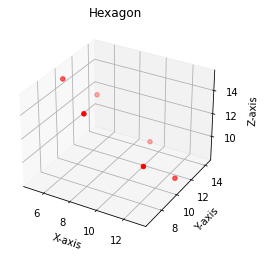

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

data = np.array([[ 5., 10., 15., 1. ],
                 [ 8.81659021, 6.56681958, 15.21659021, 1. ],
                 [12.81659021, 6.96681958, 12.01659021, 1.],
                 [13., 10.8, 8.6, 1.],
                 [ 9.18340979, 14.23318042, 8.38340979, 1. ],
                 [ 5.18340979, 13.83318042, 11.58340979, 1.]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')

# Set the title and axis labels
ax.set_title('Hexagon')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()
